In [ ]:
# Geração de dados farmaceuticos
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

hoje = datetime.now().date()
dias_para_frente = 365 * 2

num_amostras = 1000

dados = {
    'Lote': [f'LOTE-{i:04d}' for i in range(num_amostras)],
    'Estoque_Atual_unidades': np.random.randint(50, 5000, num_amostras),
    'Dias_Ate_Vencimento': np.random.randint(1, dias_para_frente, num_amostras),
    'Custo_por_Unidade_R$': np.round(np.random.uniform(10, 500, num_amostras), 2),
    'Taxa_Venda_Media_Dia': np.random.randint(1, 50, num_amostras)
}

df = pd.DataFrame(dados)

df['Risco_Vencimento'] = np.where(
    (df['Dias_Ate_Vencimento'] < 180) &
    (df['Estoque_Atual_unidades'] > 30 * df['Taxa_Venda_Media_Dia']),
    1, # Alto Risco (Vencerá logo)
    0  # Baixo Risco (Tempo suficiente)
)

df

,Lote,Estoque_Atual_unidades,Dias_Ate_Vencimento,Custo_por_Unidade_R$,Taxa_Venda_Media_Dia,Risco_Vencimento
0,LOTE-0000,1486,656,130.16,46,0
1,LOTE-0001,1726,27,294.07,20,1
2,LOTE-0002,4716,326,145.83,39,0
3,LOTE-0003,2825,386,305.85,7,0
4,LOTE-0004,847,724,406.69,1,0
...,...,...,...,...,...,...
995,LOTE-0995,1982,79,328.89,22,1
996,LOTE-0996,2103,157,95.37,4,1
997,LOTE-0997,4194,633,269.84,18,0
998,LOTE-0998,2969,380,166.49,47,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Features selecionadas (X)
features = ['Estoque_Atual_unidades', 'Dias_Ate_Vencimento', 'Taxa_Venda_Media_Dia']
X = df[features]
y = df['Risco_Vencimento']

# Divisão dos dados (70% Treino, 30% Teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinamento do Modelo (Random Forest)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Previsão e Avaliação
y_pred = modelo.predict(X_test)

print("Relatório de Classificação (Performance do Modelo):\n")
print(classification_report(y_test, y_pred))

Relatório de Classificação (Performance do Modelo):

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       233
           1       1.00      0.94      0.97        67

    accuracy                           0.99       300
   macro avg       0.99      0.97      0.98       300
weighted avg       0.99      0.99      0.99       300



In [ ]:
import joblib
# Salva o modelo treinado
joblib.dump(modelo, 'modelo_risco_vencimento.joblib')

# Para usar depois em outra aplicação:
# modelo_carregado = joblib.load('modelo_risco_vencimento.joblib')

['modelo_risco_vencimento.joblib']

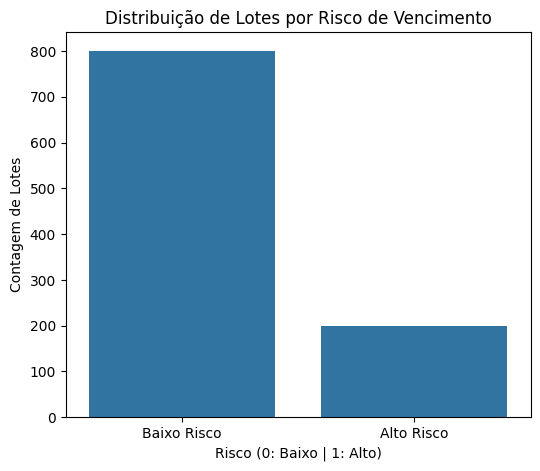

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.countplot(x='Risco_Vencimento', data=df)
plt.title('Distribuição de Lotes por Risco de Vencimento')
plt.xlabel('Risco (0: Baixo | 1: Alto)')
plt.ylabel('Contagem de Lotes')
plt.xticks([0, 1], ['Baixo Risco', 'Alto Risco'])
plt.show()

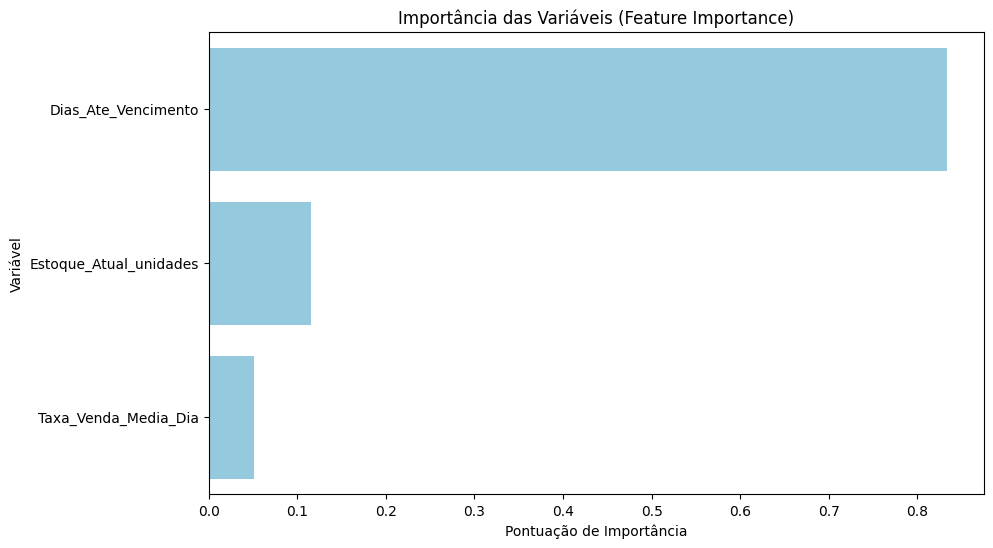

In [ ]:
# Acessando a importância das features do modelo treinado
importances = modelo.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1] # Ordena do maior para o menor

plt.figure(figsize=(10, 6))
plt.title('Importância das Variáveis (Feature Importance)')
sns.barplot(x=importances[sorted_indices], y=feature_names[sorted_indices], color='skyblue')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Variável')
plt.show()

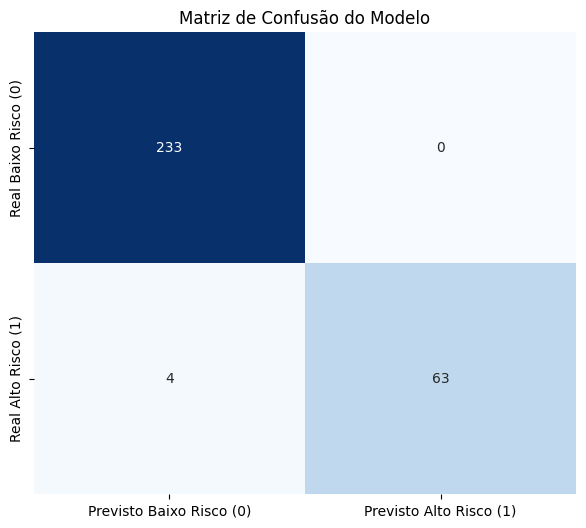


Verdadeiros Positivos (Acertos no Risco 1): 63
Falsos Negativos (Erros Perigosos): 4


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Gerar a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Real Baixo Risco (0)', 'Real Alto Risco (1)'],
                     columns = ['Previsto Baixo Risco (0)', 'Previsto Alto Risco (1)'])

# Plotar a Matriz de Confusão
plt.figure(figsize=(7, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão do Modelo')
plt.show()

# Extraia e analise as métricas (o que você já fez com o classification_report)
print("\nVerdadeiros Positivos (Acertos no Risco 1):", cm[1, 1])
print("Falsos Negativos (Erros Perigosos):", cm[1, 0])